In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# KNN Classifier

In [262]:
df = sns.load_dataset("iris")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
85,6.0,3.4,4.5,1.6,versicolor
64,5.6,2.9,3.6,1.3,versicolor
118,7.7,2.6,6.9,2.3,virginica
54,6.5,2.8,4.6,1.5,versicolor
2,4.7,3.2,1.3,0.2,setosa


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [264]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [265]:
# Iris dataset does not need scaling

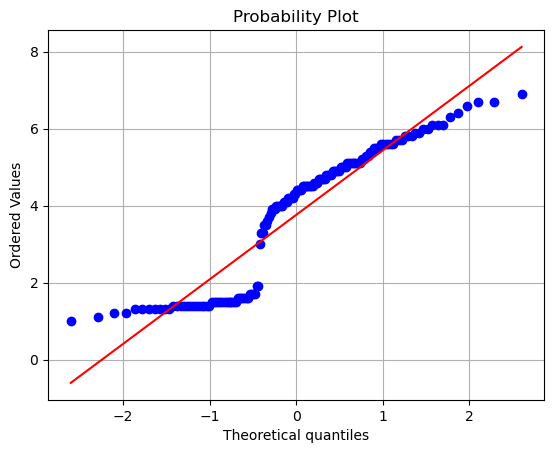

In [266]:
# Let us check the if transformation is needed for 'petal_length' and 'petal_width'
# Check the distributions of continous variables using QQ plot
import scipy
from scipy import stats
stats.probplot(df['petal_length'],dist = 'norm', plot=plt)
plt.grid()
plt.show()

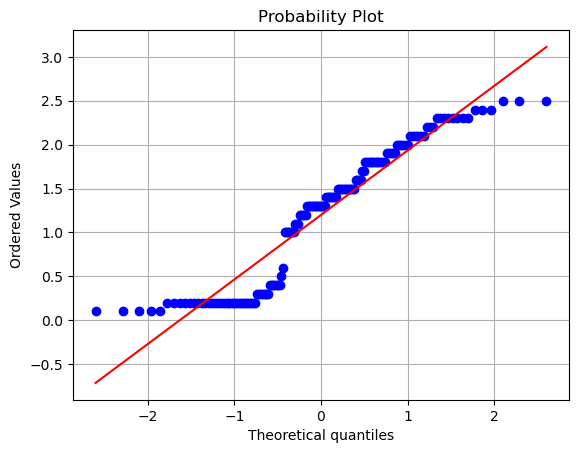

In [267]:
stats.probplot(df['petal_width'],dist = 'norm', plot=plt)
plt.grid()
plt.show()

In [268]:
# Iris dataset would need transformations we can use either 'box-cox' or 'yeo=transformation'

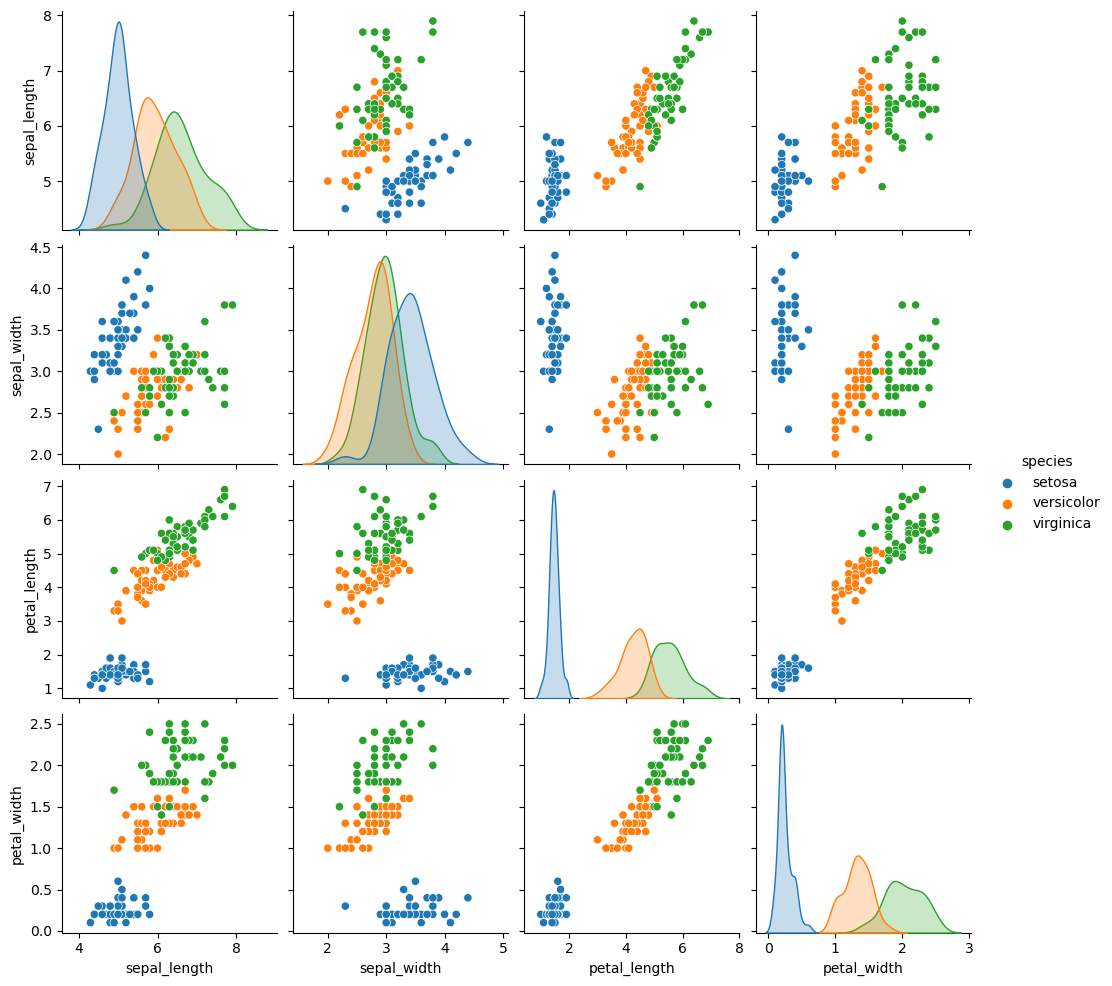

In [269]:
sns.pairplot(df, hue = 'species')

In [270]:
# Transformation - Yeo-Johnson
from sklearn.preprocessing import PowerTransformer

In [271]:
X = df[['petal_length','petal_width']]
y = df['species']

In [272]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [273]:
# Applying Power Transformation
pT = PowerTransformer()

In [274]:
Xcont = pd.DataFrame(pT.fit_transform(X),index = X.index,columns = X.columns )
Xcont

,petal_length,petal_width
0,-1.332306,-1.332266
1,-1.332306,-1.332266
2,-1.385962,-1.332266
3,-1.278441,-1.332266
4,-1.332306,-1.332266
...,...,...
145,0.818496,1.415316
146,0.701204,0.921577
147,0.818496,1.045977
148,0.936142,1.415316


In [275]:
from sklearn.model_selection import train_test_split

In [276]:
xTrain,xTest,yTrain,yTest = train_test_split(Xcont,y,
                                            test_size = 0.32)

In [277]:
xTrain.shape,xTest.shape,len(yTrain),len(yTest)

((102, 2), (48, 2), 102, 48)

In [278]:
# Classification task
from sklearn.neighbors import KNeighborsClassifier

In [279]:
# Let us choose k =sqrt(102) to nearest odd integer
n_neighbors = 11
knnC = KNeighborsClassifier(n_neighbors=n_neighbors)

In [280]:
# Training
knnC.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=11)

In [281]:
# Predict stage
yTrainPred = knnC.predict(xTrain)
yTestPred = knnC.predict(xTest)

In [282]:
import sklearn
sklearn.__version__
# Upgrade to 1.2.2

'1.0.2'

In [283]:
## Metrics to check if prediction is working well
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [284]:
accuracy_score(yTrain,yTrainPred)

0.9705882352941176

In [285]:
yTrain.value_counts()

virginica     37
setosa        35
versicolor    30
Name: species, dtype: int64

In [286]:
accuracy_score(yTest,yTestPred)

0.9375

In [287]:
confusion_matrix(yTrain,yTrainPred)

array([[35,  0,  0],
       [ 0, 30,  0],
       [ 0,  3, 34]], dtype=int64)

In [288]:
confusion_matrix(yTest,yTestPred)

array([[15,  0,  0],
       [ 0, 17,  3],
       [ 0,  0, 13]], dtype=int64)

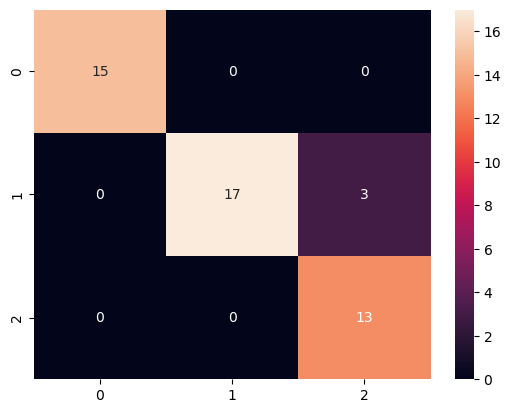

In [289]:
# If we want labels
sns.heatmap(confusion_matrix(yTest,yTestPred),annot=True)
plt.show()

In [290]:
# use confusion_matrix display
from sklearn.metrics import ConfusionMatrixDisplay

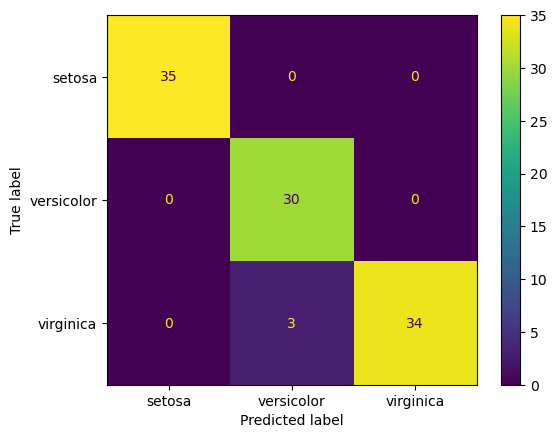

In [291]:
ConfusionMatrixDisplay(confusion_matrix(yTrain,yTrainPred),display_labels= knnC.classes_ ).plot()
plt.show()

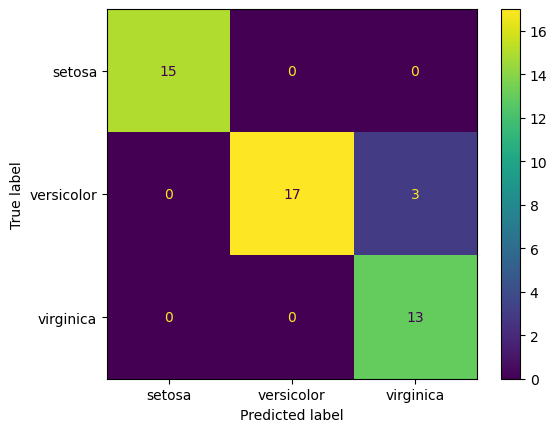

In [292]:
ConfusionMatrixDisplay(confusion_matrix(yTest,yTestPred),display_labels= knnC.classes_ ).plot()
plt.show()

# KNN Classifier Pipeline

In [296]:
X = df[['petal_length','petal_width']]
y = df['species']

In [300]:
xTrain,xTest,yTrain,yTest = train_test_split(Xcont,y,
                                            test_size = 0.32)

In [301]:
xTrain.shape,xTest.shape,len(yTrain),len(yTest)

((102, 2), (48, 2), 102, 48)

In [302]:
# This does not have any Categorical columns
# We just need a Numerical Pipeline

In [303]:
num_pipeline = Pipeline(steps=[
    ('transformation',PowerTransformer())])

In [304]:
from sklearn.neighbors import KNeighborsClassifier

In [305]:
knnC = KNeighborsClassifier(n_neighbors=11)

In [306]:
knnC_pipeline = Pipeline(steps=[
    ('num_pipeline',num_pipeline),
    ('model',knnC)
])

In [307]:
display(knnC_pipeline)

Pipeline(steps=[('num_pipeline',
                 Pipeline(steps=[('transformation', PowerTransformer())])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [308]:
knnC_pipeline.fit(xTrain,yTrain)

Pipeline(steps=[('num_pipeline',
                 Pipeline(steps=[('transformation', PowerTransformer())])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [309]:
yTrainPred = knnC_pipeline.predict(xTrain)

In [310]:
yTestPred = knnC_pipeline.predict(xTest)

In [311]:
accuracy_score(yTrain,yTrainPred)

0.9509803921568627

In [313]:
confusion_matrix(yTrain,yTrainPred)

array([[32,  0,  0],
       [ 0, 30,  2],
       [ 0,  3, 35]], dtype=int64)

In [312]:
accuracy_score(yTest,yTestPred)

0.9791666666666666

In [314]:
confusion_matrix(yTest,yTestPred)

array([[18,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]], dtype=int64)

# KNN Regressor

In [315]:
tips = sns.load_dataset('tips')

In [316]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [317]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [318]:
# No missing values
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [319]:
# Duplicate values exist
tips.duplicated().any()

True

In [320]:
# We will drop the duplicates
tips.drop_duplicates(inplace=True,ignore_index=False)

In [321]:
# Size needs to be converted to categorical
tips['size'] = tips['size'].astype('category')

In [322]:
# One duplicate was dropped
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [323]:
# We will seperate Categorical and Numerical columns
# Only selecting continous columns
cont_variables = tips.select_dtypes(['float64','int64'])
cont_variables

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [324]:
# From this we will select total_bill as input and tip as output variable
# since output is continous this is a regression task

In [325]:
# Only selecting categorical columns
cat_variables = tips.select_dtypes(['object','category','bool'])
cat_variables

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [326]:
# Nominal Categorical Variables - sex, dat, time
# Ordinal Categorical columns - smoker, size

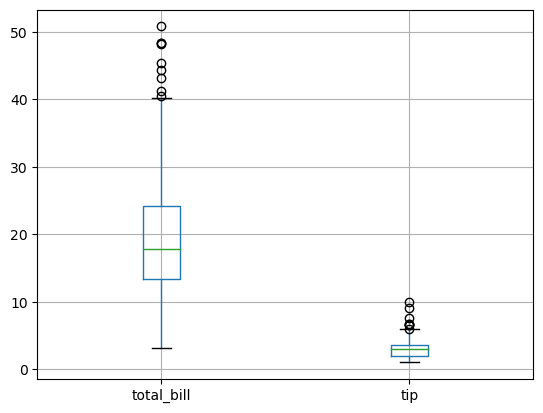

In [327]:
# Checking for Outliers
tips.boxplot()
plt.show()

In [328]:
# We see that all the continous variables have outliers on the upper bound
# The scaling is also different so we need to re-scaling
# We can choose 'Robust Scalar' which has low impact of outliers

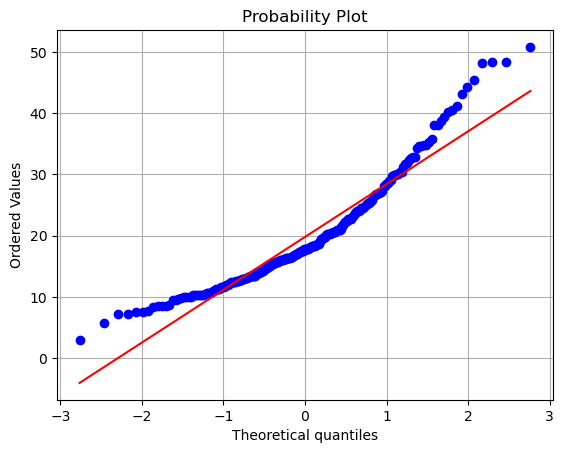

In [329]:
# Check the distributions of continous variables using QQ plot
import scipy
from scipy import stats
stats.probplot(tips['total_bill'],dist = 'norm', plot=plt)
plt.grid()
plt.show()

In [330]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

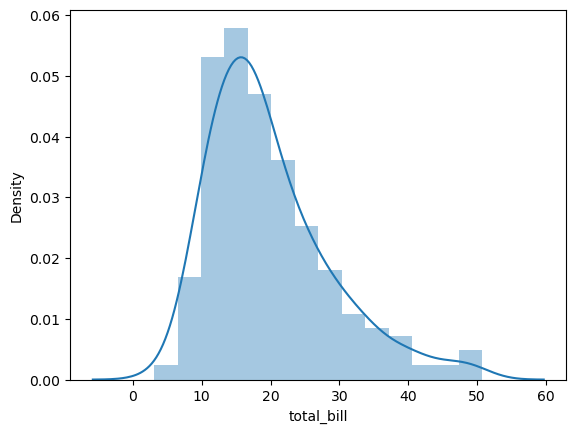

In [331]:
sns.distplot(tips['total_bill'],kde=True)

In [332]:
# Skewness less that -1 and greater than 1 highly skewed
# Skewness between -1 to -0.5 and 0.5 to 1 moderately skewed
# Skewness between -0.5 and 0.5 then symmetrical
tips['total_bill'].skew()

1.1273625781584489

In [333]:
# total_bill does not have a normal distribution and is highly skewed
# we need to use a transformer to bring it to Normal like distribution
# total_bill min value is more than 0 so we can use Box-Cox or Yeo-Johnson

# Steps:
- No missing values - Imputing not needed
- For Continous we need scaling - Robust Scalar
- For Continous we need transformation - Yeo-Johnson transformer
- For Categorical Nominal columns we need Encoding - Leave one out encoding
- For Categorical Ordinal columns we need Excoding - Ordinal Encoding


In [334]:
# Import all the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [335]:
# We will create 3 different pipeline
# Continous Pipeline
# Categorical Nominal Pipeline
# Categorical Ordinal Pipeline

In [336]:
cont_num_pipeline = Pipeline(steps=[
    ('scaling',RobustScaler()),
    ('transformation',PowerTransformer())])
cat_nom_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder(drop='first'))])
cat_ord_pipeline = Pipeline(steps=[
    ('encoding',OrdinalEncoder())])

In [337]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [338]:
# We will segregate the columns
num_cols = ['total_bill']
cat_nom_cols = ['sex', 'day', 'time']
cat_ord_cols = ['smoker','size']
target = ['tip']

In [339]:
col_trans = ColumnTransformer(transformers=[
    ('cont_num_pipeline',cont_num_pipeline,num_cols),
    ('cat_nom_pipeline',cat_nom_pipeline,cat_nom_cols),
    ('cat_ord_pipeline',cat_ord_pipeline,cat_ord_cols)
    ],
    remainder='drop',
    n_jobs=-1)

In [340]:
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [341]:
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('cont_num_pipeline',
                                 Pipeline(steps=[('scaling', RobustScaler()),
                                                 ('transformation',
                                                  PowerTransformer())]),
                                 ['total_bill']),
                                ('cat_nom_pipeline',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['sex', 'day', 'time']),
                                ('cat_ord_pipeline',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder())]),
                                 ['smoker', 'size'])])

In [342]:
n_neighbours = int(len(tips)**0.5)
n_neighbours

15

In [343]:
# Creating another pipeline to apply KNN Regressor model

from sklearn.neighbors import KNeighborsRegressor

knnR = KNeighborsRegressor(n_neighbors=n_neighbors)
knnR_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', knnR)
])

In [344]:
display(knnR_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cont_num_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('cat_nom_pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'day', 'time']),
                                                 ('cat_ord_pipeline',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['smoker', 'size'])])),
                ('model', KNeighborsRegressor(n_neighbors=11))])

In [345]:
# Splitting Input and Output Variables
X = tips[num_cols+cat_nom_cols+cat_ord_cols]
y = tips[target]

In [346]:
# Split the data
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size= 0.32)
xTrain.shape, xTest.shape, len(yTrain),len(yTest)

((165, 6), (78, 6), 165, 78)

In [347]:
knnR_pipeline.fit(xTrain,yTrain)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cont_num_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('cat_nom_pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'day', 'time']),
                                                 ('cat_ord_pipeline',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['smoker', 'size'])])),
                ('model', KNeighborsRegressor(n_neighbors=11))])

In [348]:
yTrainPred = knnR_pipeline.predict(xTrain)

In [349]:
yTestPred = knnR_pipeline.predict(xTest)

In [356]:
# Metrics to check Accuracy
# For Regression tasks we cannot use accuracy_score or confusion_matrix
# Instead will use mean_squared_error
# mse = 0 perfect match

from sklearn.metrics import mean_squared_error
mean_squared_error(yTrain, yTrainPred)

0.7139592286501378

In [357]:
mean_squared_error(yTest,yTestPred)

1.817464113159568

In [ ]:
# We have high accuracy for Train but the accuracy falls for Test data.